### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

/Users/sourav.banerjee/Documents/Codebases/LangGraph_Demystified/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CKfiInUckpzcwnvMFk6joISluIGi7', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c0ced565-f63a-43f2-a859-177e9926827e-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content='<think>\nOkay, the user is Krish and he mentioned he likes playing cricket. I should first acknowledge his introduction. I should respond in a friendly and engaging way to encourage further conversation. Let me make sure to address both parts of his message: his name and his interest in cricket. I can ask about his favorite teams or players to keep the conversation going. Also, maybe ask if he plays any other sports. I should keep the tone positive and enthusiastic. Let me check for any grammar issues. Alright, that should work.\n</think>\n\nHi Krish! Nice to meet you! 🏏 Cricket is an awesome sport—do you play it often, or are you more of a fan? If you play, what position do you usually take on the field? And do you have a favorite team or cricketer? Let me know! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 172, 'prompt_tokens': 18, 'total_tokens': 190, 'completion_time': 0.40418966, 'prompt_time': 0.000789768, 'queue_time': 0.055

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

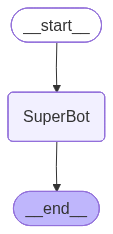

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='fa0f144f-3221-4fc9-9290-ce7dfec224f5'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should acknowledge their name first and express that I'm happy to meet them. Next, since cricket is a key point, I need to respond positively to their interest.\n\nI should ask them about what aspect of cricket they enjoy most, like playing, watching, or following specific teams. This helps in engaging in a more detailed conversation. Also, maybe ask if they have a favorite team or player. It's important to keep the questions open-ended to encourage them to share more. Let me make sure my tone is friendly and welcoming.\n</think>\n\nHi Krish! Nice to meet you! 🏏 I'm glad to hear you like cricket—it's such an exciting sport! Do you enjoy playing it, watching matches, or following a particular team? Also, do you have

#### Streaming The responses

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as KRish. I should acknowledge his name and maybe ask how I can assist him. Keep it friendly and open-ended. Let me make sure to use his name in the response to personalize it. Also, check for any typos or errors in the response. Alright, that should do it.\n</think>\n\nHello KRish! It's nice to meet you. How can I assist you today? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 14, 'total_tokens': 105, 'completion_time': 0.19477582, 'prompt_time': 0.000628129, 'queue_time': 1.197437518, 'total_time': 0.195403949}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f887997e-4051-426c-aaa3-c5c8cba2c9c7-0', usage_metadata={'input_tokens': 14, 'output_tokens': 91, 'total_tokens': 105})]}}
